In [91]:
import pandas as pd
import numpy as np
from math import *

def generar_puntos(centro, mat_cov, size):
  rng = np.random.default_rng()
  return rng.multivariate_normal(centro, mat_cov, size).tolist()

def generar_centro_a(d, val):
  return np.repeat(val, d)

def generar_centro_b(d, val):
  return val + np.repeat(0, d)

def taggear(lista, val):
  iter_list_tag = map(lambda x: x + [val], lista)
  # Por alguna razon, se sobreescribe list en algun lado y tengo que usar el builtin por defecto.
  return __builtins__.list(iter_list_tag)

def generar_clases(C, std, n, centro1, centro2):
  cov = std ** 2
  mat_cov = np.diag(d * [cov])
  size = 2*n

  clase1 = generar_puntos(centro1, mat_cov, size // 2)
  clase1_contag = taggear(clase1, 0)

  clase2 = generar_puntos(centro2, mat_cov, size // 2)
  clase2_contag = taggear(clase2, 1)
  lista = clase1_contag + clase2_contag

  colNames = __builtins__.list(range(d)) + ["Clase"]

  return pd.DataFrame(lista, columns=colNames)

def generar_clase_a(C, d, n):
  centro1a = generar_centro_a(d, 1)
  centro2a = generar_centro_a(d, -1)
  return generar_clases(C, sqrt(d), n, centro1a, centro2a)

def generar_clase_b(C, d, n):
  centro1b = generar_centro_b(d, 1)
  centro2b = generar_centro_b(d, -1)
  return generar_clases(C, sqrt(d), n, centro1b, centro2b)  

C = 0.75
d = 2
n = 200

df_a = generar_clase_a(C, d, n)
df_b = generar_clase_b(C, d, n)



In [92]:
import matplotlib.pyplot as plt

# Fuente: https://stackoverflow.com/a/63539077
def graph_df(df):
  # Separo los puntos por clase
  x0, y0 = df[0][df.Clase == 0], df[1][df.Clase == 0]
  x1, y1 = df[0][df.Clase == 1], df[1][df.Clase == 1]

  # Calculo los máximos y mínimos para tener límites en x e y del gráfico simétricos
  xmax, xmin = max(max(x0), max(x1)), min(min(x0), min(x1))
  #xmax = max(abs(xmax), abs(xmin))
  
  ymax, ymin = max(max(y0), max(y1)), min(min(y0), min(y1))
  #ymax = max(abs(ymax), abs(ymin))

  xmax = np.ceil(max(xmax, ymax))
  ymax = xmax
  xmin, ymin = xmax * -1, ymax * -1

  # Grafico
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.scatter(x0, y0, c = 'blue', label = "Clase 0")
  ax.scatter(x1, y1, c = 'red', label = "Clase 1")

  ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')

  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  
  ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
  ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

  x_ticks = np.arange(xmin, xmax+1, 1)
  y_ticks = np.arange(ymin, ymax+1, 1)
  ax.set_xticks(x_ticks[x_ticks != 0])
  ax.set_yticks(y_ticks[y_ticks != 0])
 
  ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

  # arrow_fmt = dict(markersize=4, color='black', clip_on=False)
  # ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
  # ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

  ax.legend()

  plt.show()


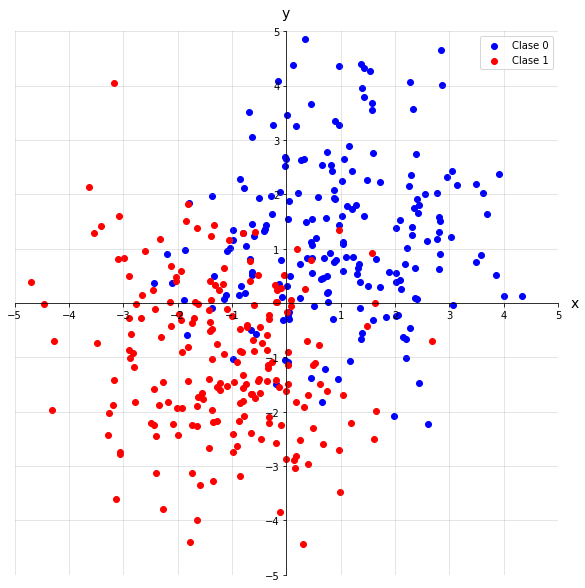

In [93]:
# Gráfico del punto a
graph_df(df_a)

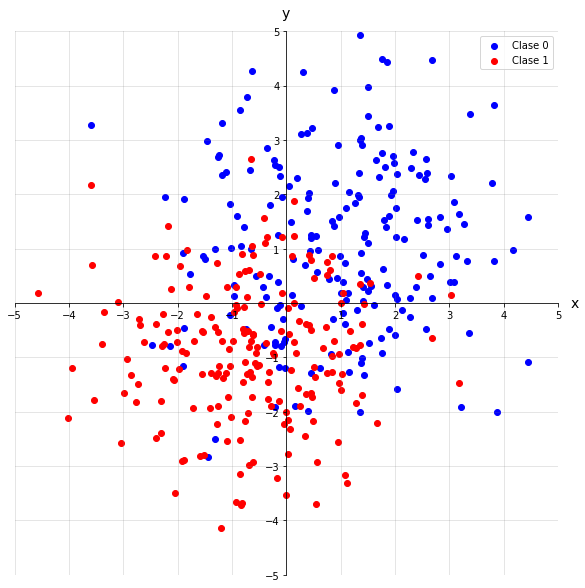

In [94]:
# Gráfico del punto b
graph_df(df_b)

In [95]:
# Para verificar los problemas a) y b), genere conjuntos con d=2, n=200 y C=0.75, y grafíquelos. También genere conjuntos con d=4, n=2000 y C=2.00, 
# y verifique en el código que las medias y desviaciones estándar sean correctas.

C = 2.00
d = 4
n = 2000

df_a2 = generar_clase_a(C, d, n)
df_b2 = generar_clase_b(C, d, n)

for df in [df_a2, df_b2]:
  print(df.groupby('Clase').mean())
  print(df.groupby('Clase').std())

              0         1         2         3
Clase                                        
0      1.045007  1.013834  0.947902  0.964610
1     -0.983046 -1.029080 -1.026271 -0.939361
              0         1         2         3
Clase                                        
0      2.018908  1.945182  2.031176  2.080827
1      1.955243  2.010342  1.948796  2.027337
              0         1         2         3
Clase                                        
0      0.963637  0.913163  0.913799  0.950393
1     -0.951836 -0.961100 -1.019218 -0.964026
              0         1         2         3
Clase                                        
0      1.936430  1.987086  2.003207  1.973074
1      1.957647  2.028903  1.982889  1.970659
